# Promi Exercise Sheet 2: Probability Distributions

In [63]:
import numpy as np
from matplotlib import pyplot as plt
import math 

In [64]:
def test_true(test_name, value: bool):
    if value:
        #print("\033[92mTest {}: passed.\033[0m".format(test_name))
        print(f'Test {test_name}: passed.')
    else:
        #print("\033[91mTest {}: failed.\033[0m".format(test_name))
        print(f'Test {test_name}: failed.')

# equality
def test_almost_equal(test_name, value: float, target: float, precision: float = 1e-4):
    test_true(test_name, abs(value - target) < precision)

# almost equal
def test_almost_zero(test_name, value: float, precision: float = 1e-4):
    test_almost_equal(test_name, value, 0.0, precision=precision)

def test_almost_equal_array(test_name, value: np.ndarray, target: np.ndarray, precision: float = 1e-4):
    test_true(test_name, np.all(np.abs(value - target) < precision))

def test_shape_equal(test_name, arr, des_shape):
    test_true(test_name, arr.shape==des_shape)

# Part 1: Modeling Probability Distributions

## Question 1.1: Implement PMF/PDF of distributions
In this task  implement the Probability Mass function/Probability Density function of the following distributions.
1. Bernoulli
2. Binomial
3. Poisson
4. Gaussian

In [65]:
def bernoulli(k:int,p:float):
    return (1 - p) if k == 0 else p

In [66]:
def binomial(k:int,n:int,p:float):
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

In [67]:
def poisson(k:int,lam:float):
    return ((lam ** k) / (math.factorial(k))) * (math.e ** (- lam))

In [68]:
def gaussian(x:float,mu:float,sigma:float):
    return (1 / math.sqrt(2 * math.pi * sigma ** 2)) * math.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

#### Public Tests

In [69]:
test_cases_bernoulli = [((0,0.5), 0.5), ((1,0.5), 0.5), ((0,0.2), 0.8), ((1,0.2), 0.2)]

for i,((k,p), sol) in enumerate(test_cases_bernoulli):
    test_almost_equal(f"bernoulli {i}", bernoulli(k,p), sol)
print("\n")

test_cases_binomial = [((5,2,0.5), 0.3125), ((5,3,0.5), 0.3125), ((5,2,0.2), 0.2048), ((5,3,0.2), 0.0512)]

for i,((n,k,p), sol) in enumerate(test_cases_binomial):
    test_almost_equal(f"binomial {i}", binomial(k,n,p), sol)
print("\n")

test_cases_poisson = [((0,1), 0.3678), ((1,1), 0.3678), ((0,2), 0.13534), ((1,2), 0.27067)]
for i,((k,lam), sol) in enumerate(test_cases_poisson):
    test_almost_equal(f"poisson {i}", poisson(k,lam), sol)
print("\n")

test_cases_gaussian = [((0,0,1), 0.3989), ((1,0,1), 0.24197), ((600,897,200), 0.00066225), ((8,10,35), 0.01138)]
for i,((x,mu,sigma), sol) in enumerate(test_cases_gaussian):
    test_almost_equal(f"gaussian {i}", gaussian(x,mu,sigma), sol)

Test bernoulli 0: passed.
Test bernoulli 1: passed.
Test bernoulli 2: passed.
Test bernoulli 3: passed.


Test binomial 0: passed.
Test binomial 1: passed.
Test binomial 2: passed.
Test binomial 3: passed.


Test poisson 0: passed.
Test poisson 1: passed.
Test poisson 2: passed.
Test poisson 3: passed.


Test gaussian 0: passed.
Test gaussian 1: passed.
Test gaussian 2: passed.
Test gaussian 3: passed.


## Question 1.2
Using the implemented PMFs/PDFs, create a plot for each distribution that visualizes the PMF/PDF in a range specified below. Furthermore, visualize the mean and standard deviation of the distributions. Furthermore, explain the parameters of the distributions beneath the plot.

Note: In the following tasks you will be asked to visualize at least 2 pdfs/pmfs per distribution with different parameters. Please only use one plot to visualize both pdfs/pmfs.
Note: Think about a smart way to visualize the mean and the standard deviation so that the plot is easy to read.

### 1. Bernoulli Distribution: Create 2 pmfs of the Bernoulli distributions with follwing parameters
- $p=0.2$
- $p= 0.653$
    
**Hint**: Use the `plt.bar()` function from matplotlib to visualize the distributions.
    

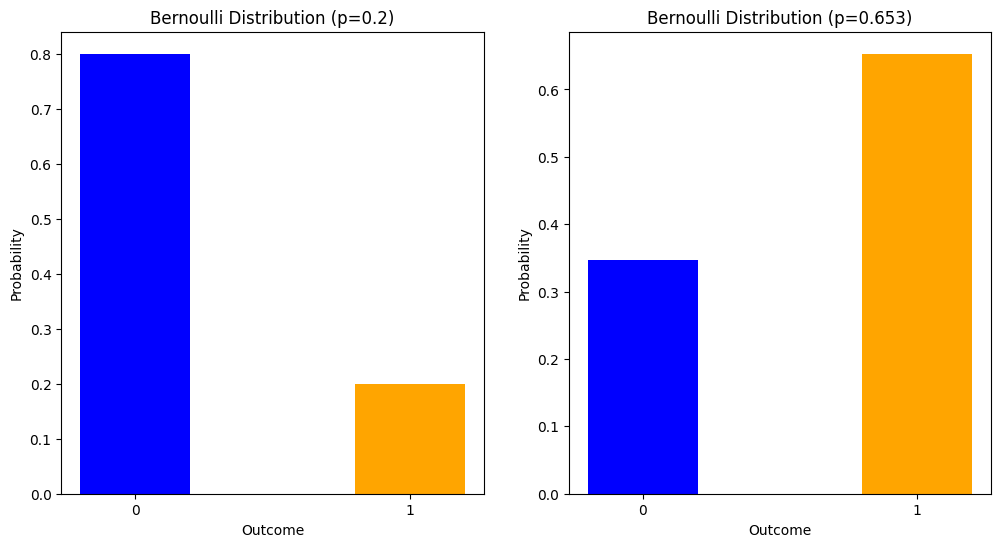

In [70]:
def plt_bernolli():
    p1 = 0.2
    p2 = 0.653

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar([0, 1], [1 - p1, p1], width=0.4, color=['blue', 'orange'])
    plt.title(f'Bernoulli Distribution (p={p1})')
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.xticks([0, 1])

    plt.subplot(1, 2, 2)
    plt.bar([0, 1], [1 - p2, p2], width=0.4, color=['blue', 'orange'])
    plt.title(f'Bernoulli Distribution (p={p2})')
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.xticks([0, 1])

plt_bernolli()

Explain here the parameters of the Bernoulli distribution

#### YOUR SOLUTION HERE

The Bernoulli distribution is a discrete probability distribution for a random variable $X$ that takes on:

- $X = 1$ with probability $p$
- $X = 0$ with probability $1 - p$

Here, $p$ represents the probability of success.



### 2. Binomial Distribution: Plot the pmf for 2 different Binomial distributions
     
- $n=50$, $p=0.2$
- $n=50$, $p=0.6$

**Hint**: Use the `plt.scatter()` function to plot the distributions.

**Hint**: One possible range of visualization is $k \in [0,50]$.

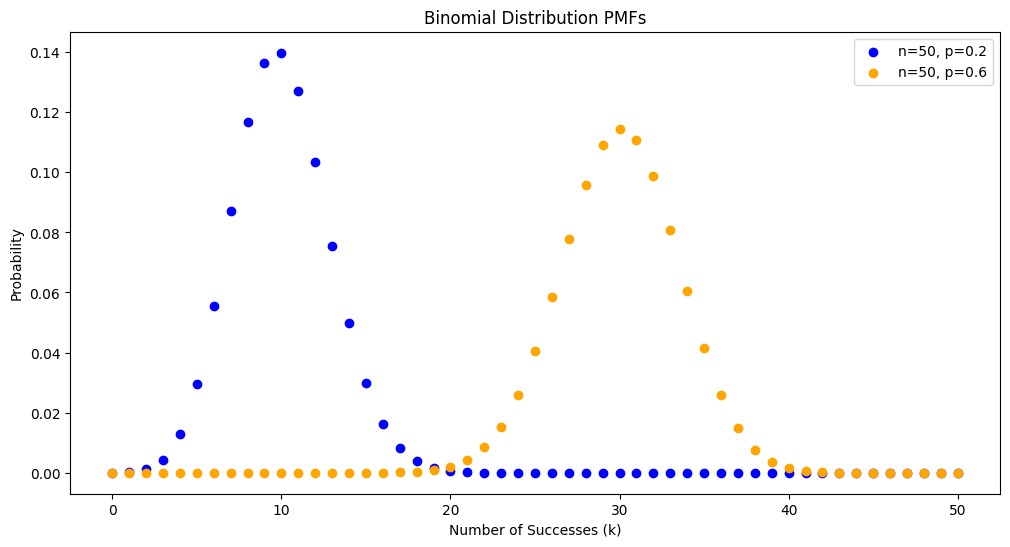

In [71]:
def plt_binomial():
    k = range(0, 51)

    pmf_1 = [binomial(x, 50, 0.2) for x in k]
    pmf_2 = [binomial(x, 50, 0.6) for x in k]

    plt.figure(figsize=(12, 6))

    plt.scatter(k, pmf_1, c='blue', label='n=50, p=0.2')
    plt.scatter(k, pmf_2, c='orange', label='n=50, p=0.6')

    plt.title('Binomial Distribution PMFs')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()

plt_binomial()

Explain here the parameters of the Binomial distribution

#### YOUR SOLUTION HERE

1. $n$: Number of trials
    - Represents the total number of independent experiments conducted.

2. $p$: Probability of success
    - Represents the probability of getting a "success" in a single trial.

3. $k$: Number of successes`
    - It Represents the specific number of successes we are calculating the probability for.

### 3. Poisson Distribution: Plot 2 poisson distributions with the following parameters.

- $\lambda = 1$
- $\lambda = 10$

**Hint**: Use the plt.scatter() function from matplotlib to visualize the distribution.

**Hint**: One possible range of visualisation is $k \in [0,20]$.

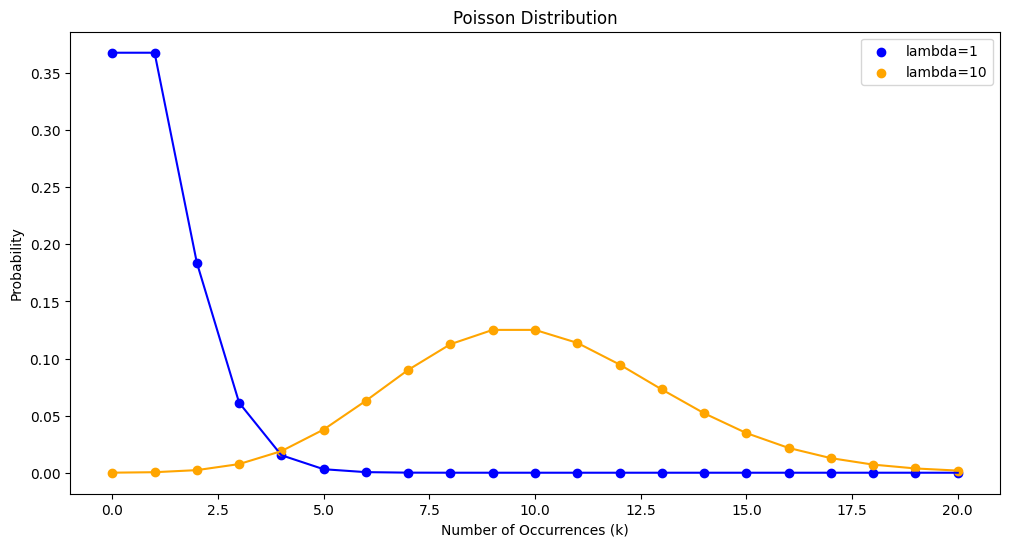

In [72]:
def plt_poisson():
    k = range(0, 21)

    plot_1 = [poisson(x, 1) for x in k]
    plot_2 = [poisson(x, 10) for x in k]

    plt.figure(figsize=(12, 6))

    plt.scatter(k, plot_1, c='blue', label='lambda=1')
    plt.plot(k, plot_1, c='blue')

    plt.scatter(k, plot_2, c='orange', label='lambda=10')
    plt.plot(k, plot_2, c='orange')

    plt.title('Poisson Distribution')
    plt.xlabel('Number of Occurrences (k)')
    plt.ylabel('Probability')
    plt.legend()

plt_poisson()


Here explain the parameters of the Poisson distribution

#### YOUR SOLUTION HERE

1. $\lambda$:
    - It represents the average number of events that occur in a fixed interval of time or space.

2. $k$:
    - This is the number of occurrences or "successes" we are interested in observing.

### 4. Gaussian Distribution: Plot 2 Gaussian Distribution with the following parameters:
   - $\mu=0$ $\sigma= 5$
   - $\mu = 46$ $\sigma=10$
    

In [73]:
def plt_gaussian():
    #### YOUR SOLUTION HERE


plt_gaussian()

IndentationError: expected an indented block after function definition on line 1 (3776516942.py, line 5)

Explain here the parameters of the Gaussian distribution

#### YOUR SOLUTION HERE

## Question 1.3.
Explain the relationship between Bernoulli and binomial, binomial and Poisson, binomial and Gaussian.

### 1. Bernoulli and bionmial

#### YOUR SOLUTION HERE

### 2. Binomial and Poisson

#### YOUR SOLUTION HERE

### 3. Binomial and Gaussian

#### YOUR SOLUTION HERE


## Question 2.1: Transformations
Suppose $X$ is a continuous random variable with pdf $f_X$ and cdf $F_X$.
Let $Z = |X|$. First, show that the cdf $F_Z$ of $Z$ is given by $F_Z(z) = F_X(z) - F_X(-z)$. Then, show that the pdf $f_Z$ of $Z$ is given by $f_Z(z) = f_X(z) + f_X(-z)$.

**Hint**: Think about how you can use properties $Z=|X|$ to solve this task

#### YOUR SOLUTION HERE

## Question 2.2: Change of variable
Let $Y = a + bX$ with $a \in \mathbb{R}$ and $b \in \mathbb{R} \setminus 0$. Show that the pdf $p_Y$ of $Y$ is given by $p_Y(y) = \frac{1}{|b|}p_X(\frac{y-a}{b}).$

#### YOUR SOLUTION HERE

## Question 3.1: Categorical Distribution
We can represent a categorical distribution using an array e.g. `p = np.array([0.1, 0.2, 0.7])`.
Write a function `plot_categorical(p: np.ndarray)` that creates a plot of the distribution given a probability array `p`.

**Note**: Implement the function so that the number of categories can be chosen arbitrarily.

In [ ]:
def plot_categorical(p: np.ndarray):
    #### YOUR SOLUTION HERE

p = np.array([0.1, 0.2, 0.7])
plot_categorical(p)

## Question 3.2: Convolution
Write a convolution function that given two categorical distributions computes their convolution. Implement the convolution computation on your own and **do not** use already implemented functions from libraries.

In [ ]:

def compute_convolution(p1:np.ndarray, p2:np.ndarray):
    #### YOUR SOLUTION HERE

    

### PUBLIC TESTS


In [ ]:
test_cases = [((np.array([0.2, 0.8]), np.array([0.3, 0.7])), np.array([0.06, 0.38, 0.56])),((np.array([0.1, 0.9]), np.array([0.2, 0.5,0.3])), np.array([0.02, 0.23, 0.48,0.27]))]
for i,((p1, p2), sol) in enumerate(test_cases):
    test_almost_equal_array(f"convolution {i}", compute_convolution(p1, p2), sol)
    test_almost_equal(f"Sum convolution {i}",np.sum(compute_convolution(p1,p2)),1)

### Visualisation
If your convolution is implemented correctly. We can now use the `plot_categorical` function to visualize the convolution.

In [ ]:
p1 = np.array([0.5, 0.0, 0.5])
p2 = np.array([0.3, 0.4, 0.05,0.05,0.2])

result = compute_convolution(p1, p2)
plot_categorical(result)

## Question 3.3.1
Implement the function `convolve_n_times(p:np.ndarray,n:int)` that computes the convolution of $N$ independent and identically distributed categorical random variables. Use the functions `compute_convolution` from before.

In [ ]:
def convolve_n_times(p: np.ndarray,n:int):
    #### YOUR SOLUTION HERE

In [ ]:
### PUBLIC TESTS
test_cases = [((np.array([0.2, 0.8]), 3), np.array([0.0016, 0.0256, 0.1536, 0.4096, 0.4096])),((np.array([0.1, 0.9]), 10), np.array([1.00000000e-11, 9.90000000e-10, 4.45500000e-08, 1.20285000e-06,2.16513000e-05, 2.72806380e-04 ,2.45525742e-03, 1.57837977e-02
 ,7.10270897e-02,2.13081269e-01, 3.83546284e-01, 3.13810596e-01]))]

for i,((p1, n), sol) in enumerate(test_cases):
    test_almost_equal_array(f"convolution {i}", convolve_n_times(p1, n), sol)
    test_almost_equal(f"Sum convolution {i}",np.sum(convolve_n_times(p1,n)),1)

## Question 3.3.2
Now we plot the convolution for $N=1$, $N=10$, $N=100$, $N=1000$. What do you notice?

**Hint**: Think about the Central Limited Theorem

In [ ]:
p = np.array([0.1, 0.2, 0.7])
result_1 = convolve_n_times(p, 1)
result_10 = convolve_n_times(p, 10)
result_100 = convolve_n_times(p, 100)
result_1000 = convolve_n_times(p, 1000)

plot_categorical(result_1)
plot_categorical(result_10)
plot_categorical(result_100)
plot_categorical(result_1000)

#### YOUR SOLUTION HERE

## Question 4: Mixture Models

### Q4.1: Mean and Variance of Gaussian Mixture Models
Derive the mean and variance of a Gaussian Mixture Model.

#### YOUR SOLUTION HERE


### Q4.2: Mixture Model Class
Implement the following functions to complete the `GaussianMixtureModel` class.

a) PMF: Implement the pmf of the mixture of Gaussians in `pdf`.

b) Sampling:
Implement a function that draws a sample from a Gaussian Mixture Model. Sampling consists of two steps:
First, sample which mixture component should be used.
Second, sample from the corresponding Gaussian.

In [ ]:
class GaussianMixtureModel:

    def __init__(self, pi, mus, sigmas, seed=0) -> None:
        self.n = len(mus)
        self.pi = pi
        self.mus = mus
        self.sigmas = sigmas
        np.random.seed(seed)
    
    def pdf(self, x):
        #### YOUR SOLUTION HERE

    def sample(self, n_samples: int):
        #### YOUR SOLUTION HERE
    

In [ ]:
# PDF test
import scipy
test_cases = [
    (([0.3, 0.7], [1, 0], [1, 4], 42, 2), 0.13420),
    (([1], [0], [0.1], 42, 0), 3.98942),
    (([1], [0], [0.1], 42, 1), 0),
    (([0.2, 0.5, 0.3], [1, 0, 5], [1, 4, 0.2], 42, 5), 0.62127),
    (([0.2, 0.3, 0.4, 0.1], [1, 0, 5, 2], [2, 4, 0.2, 1], 42, 1), 0.09309),
]
for i, ((pi, mu, sigma, seed, x), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    model = GaussianMixtureModel(
        pi=pi,
        mus=mu,
        sigmas=sigma,
        seed=seed
    )
    pred = model.pdf(x)
    test_almost_equal(f'{i}', pred, sol)

In [ ]:
# Sampling test
test_cases = [
    (
        ([0.3, 0.7], [1, 0], [1, 4], 42, 10),
        ([-1.87789754,  2.17024017, -1.85367077, -1.86291901,  1.24196227, -0.91328024, -0.72491783, -2.24915012, -4.05132448,  1.25698933])
    )
]

for i, ((pi, mu, sigma, seed, n_samples), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    model = GaussianMixtureModel(
        pi=pi,
        mus=mu,
        sigmas=sigma,
        seed=seed
    )
    pred = model.sample(n_samples)
    test_shape_equal(f'{i} [shape]', pred, (n_samples,))
    test_almost_equal_array(f'{i} [vals]', pred, sol)

## Question 5: Non-Parametric Models

In [ ]:
model = GaussianMixtureModel(
    pi=[0.2, 0.25, 0.4, 0.15],
    mus=[-1, 0, 3, 9],
    sigmas=[1, 4, 2, 0.5],
    seed=0
)

### Q5.1: Sampling
Sample a dataset of points using the mixture model defined above. 
In a single plot, plot:

1. The distribution of points in a histogram.
2. The corresponding ground-truth distribution (mixture of Gaussians).

In [ ]:
#### YOUR SOLUTION HERE

### Q5.2: Kernels
Implement the following kernels:
1. Uniform
2. Epanechnikow
3. Gaussian

In [ ]:
def uniform_kernel(x):
    #### YOUR SOLUTION HERE

def epanechnikov_kernel(x):
    #### YOUR SOLUTION HERE

def gaussian_kernel(x):
    #### YOUR SOLUTION HERE

In [ ]:
# Kernel test
test_cases = [
    (1, (0.5, 0, 0.24197)),
    (2, (0., 0, 0.05)),
    (0.1, (0.5, 0.7425, 0.39695)),
]

for i, (x, (s1, s2, s3)) in enumerate(test_cases):
    # Compute DGL step using your function
    p1 = uniform_kernel(x)
    p2 = epanechnikov_kernel(x)
    p3 = gaussian_kernel(x)
    # print(pred)
    test_almost_equal(f'{i} [uniform]', p1, s1)
    test_almost_equal(f'{i} [epanechnikov]', p2, s2)
    test_almost_equal(f'{i} [gaussian]', p3, s3)


### Q5.3: Kernel Density Estimation
Given points and a kernel, compute the kernel density estimation.

In [ ]:
def compute_kde(x, kernel_fct, pts, h):
    #### YOUR SOLUTION HERE

In [ ]:
# KDE Test 

test_cases = [
    ((1, np.linspace(-10, 10, 100), 0.1), (0.05, 0.01302, 0.04875)),
    ((2, np.linspace(-10, 10, 100), 0.8), (0.05, 0.04984, 0.0495)),
]

for i, ((x, pts, h), (s1, s2, s3)) in enumerate(test_cases):
    # Compute DGL step using your function
    p1 = compute_kde(x, uniform_kernel, pts, h)
    p2 = compute_kde(x, epanechnikov_kernel, pts, h)
    p3 = compute_kde(x, gaussian_kernel, pts, h)
    test_almost_equal(f'{i} [uniform]', p1, s1)
    test_almost_equal(f'{i} [epanechnikov]', p2, s2)
    test_almost_equal(f'{i} [gaussian]', p3, s3)

### Q5.4: Plot the kernel density estimation alongside the ground-truth distribution
Create a single plot, containing the following:
1. The ground truth Gaussian mixture distribution from 5.1
2. The sampled points in a histogram
3. The uniform KDE for $h=0.05$, $0.2$, $1$
4. The Epanechnikov KDE for $h=0.05$, $0.2$, $1$
5. The Gaussian KDE for $h=0.05$, $0.2$, $1$

In [ ]:
#### YOUR SOLUTION HERE

# Part 2: Parametric Density Estimation

In [ ]:
from scipy.stats import binom
from scipy.stats import beta as beta_dist

## Question 1: MLE for Categorical Distributions
Let's consider an experiment with $K$ different outcomes. The outcomes are modeled as a one-hot encoding
        $$\boldsymbol{x}\in\{0, 1\}^K; \qquad \sum_{i=1}^{K} x_i = 1$$

We chose to model the outcome of the experiment by a random variable $X$ which is distributed as categorical distribution with probability-mass function (pmf) $f(\boldsymbol{x};\boldsymbol{\theta}) = \prod_{i=1}^{K}\theta_i^{x_i}$ where $\theta_i$ represents the probability of $x_i$. Thus, we need to make sure that $\sum_{i = 1}^K \theta_i = 1$.
        
Assume now that we are given a set of data $\mathcal{D} = \{\boldsymbol{x}_j|j=1,\dots,N\}$. Please derive the parameters of the categorical distribution $\theta_i^{\mathrm{ml}}$ that maximize the pmf given the data $\mathcal{D}$.

_Hint 1_: If you do it right, the (not explicitly mentioned) constraint $\forall i: \theta_i \in [0, 1]$ is always fulfilled by the optimal solution. So you can safely ignore it in your derivations.\
_Hint 2_: Rewrite the constraint $\sum_{i=1}^{K} \theta_i = 1$ as $\theta_K = 1 - \sum_{i=1}^{K-1} \theta_i$.

#### YOUR SOLUTION HERE

## Question 2: Modelling a Die
We now consider an experiment where we throw a die. 
Which distribution would you choose to model the outcome that we throw a 6. Please state the parameters of your chosen distribution and derive the maximum likelihood parameters. How is your chosen distribution connected to the Categorical distribution?

Hint: You don't need to do all calculations again to obtain the maximum likelihood parameters.

#### YOUR SOLUTION HERE

## Question 3: Modelling N Dice
Next up, we consider throws with $m$ dice. To determine how many 6s we can throw with $m$ dice, we model the experiment by a binomial distribution. 
The random variable $X$ can take values in $x\in\{1,\dots, n\}$ modeling how many times we threw a 6 with $m$ dice. 
The pmf for the binomial is
        
$$f_n(x;\theta) = \begin{pmatrix}
            n\\x
  \end{pmatrix} \theta^{x} (1-\theta)^{n-x}.$$
        
Here $m$ denotes the number of dice, $x$ denotes the number of times that a 6 has been thrown, and $\theta$ is the probability of throwing a 6.
  
The maximum likelihood estimate of the binomial distribution given a dataset $\mathcal{D}$ can be shown to be
        
$$\theta^{\mathrm{ml}} = \frac{1}{N} \sum_{i=1}^{N} \frac{x_i}{m}.$$
        
Please plot the data, which you can collect for $m=10$ throws using the below code, against the binomial distribution with the maximum likelihood estimate $\theta^{\mathrm{ml}}$ for the $N=10, 100, 1000$ first data points in the dataset. Describe the differences between the three plots.

In [ ]:
M = 10
P = 1 / 6


def draw_binomial(n: int):
    rng = np.random.default_rng(42)
    return rng.binomial(M, P, size=n)


DATA = draw_binomial(1000)

In [ ]:
#### YOUR SOLUTION HERE

We can see that the data matches better with higher number of data points, i.e. if more evidence is available.

## Question 4: Parameter Priors
The beta distribution is a continuous univariate distribution over $\theta$, parameterized by $\alpha$ and $\beta$ with pdf
        
\begin{align*}
    \mathrm{beta}(\theta;\alpha, \beta) &= \frac{1}{\mathrm{B}(\alpha, \beta)} \theta^{\alpha - 1}(1-\theta)^{\beta - 1}; \quad \theta\in(0,1)\\
    \mathrm{B}(\alpha, \beta) &= \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha +  \beta)}
\end{align*}
        
Here $\mathrm{B}(\alpha, \beta)$ is the beta-function, represented by the gamma-function, which acts as a normalization constant. 
The term is not required for further calculations and thus, we will not further introduce it.

Let's assume that the parameters $\theta$ of the binomial distribution $\mathrm{binomial}_n(x|\theta)$ introduced in Question 3 are random variables. 
We define the prior over the parameters by a beta distribution with $\alpha_0$, $\beta_0$. 
Calculate the posterior of the likelihood under the beta prior. Which type of distribution does the posterior assume? 
How is this concept called in the literature?

Hint: Please elaborate if you need to explicitly calculate the evidence. 
Use the fact that the posterior is proportional to the joint distribution.

#### YOUR SOLUTION HERE

## Question 5: Posterior Updates
In Bayesian inference, the posterior is updated sequentially by adding more and more data. Please plot the prior distribution, with $\alpha_0 = \beta_0 = 1$, and the posterior distribution $p(\theta|x_{1:N})$ for the first $N=1,2,5,10,100$ datapoints. 
Use the results of the previous question. 
Also, plot the maximum likelihood estimate of the binomial distribution for $N=1000$ datapoints from Question 3. 
Interpret the results and outline the differences between Bayesian estimation and maximum likelihood estimation.

In [ ]:
#### YOUR SOLUTION HERE

#### YOUR SOLUTION HERE